In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Two types of windows
-Rectangle window
$$\begin{equation*}\omega(n) = \begin{cases} 1 \ &\text{n $\in\left[ 0, N-1 \right]$}\\ 0 \ &\text{n $\notin\left[ 0, N-1 \right]$}\end{cases}\end{equation*}$$
-Hann window
$$\omega(n)=0.5\left(1 - cos(\frac{2\pi n}{N -1})\right)$$

In [91]:
def rectangleWindow(n, N):
	return 1 if 0 <= n < N else 0

In [92]:
def hannWindow(n, N):
	return 0.5 * (1 - np.cos(2 * np.pi * n / (N - 1)))

In [93]:
def discreteFourierTransform(f, window):
	N = f.size
	Fx = np.zeros_like(f, dtype=complex)
	for k in range(N):
		for n in range(N):
			Fx[k] += f[n] * window(n - k, N) * np.exp(1j * (2 * np.pi / N) * k * n)
	return Fx

In [94]:
(a0, a1) = (1, 0.002)

w0 = 5.1
w1 = 5 * w0

n = 1000
T = np.linspace(0, 2 * np.pi, n)

## $f(t)=a_{0}sin(\omega_{0}t)+a_{1}sin(\omega_{1}t)$

In [95]:
f = a0 * np.sin(w0 * T) + a1 * np.sin(w1 * T)

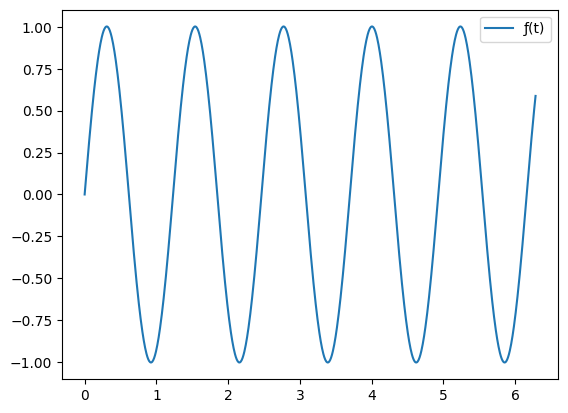

In [100]:
plt.plot(T, f, label='ƒ(t)')
plt.legend()
plt.show()

In [97]:
spectrumRectangle = discreteFourierTransform(f, rectangleWindow)
spectrumHann = discreteFourierTransform(f, hannWindow)

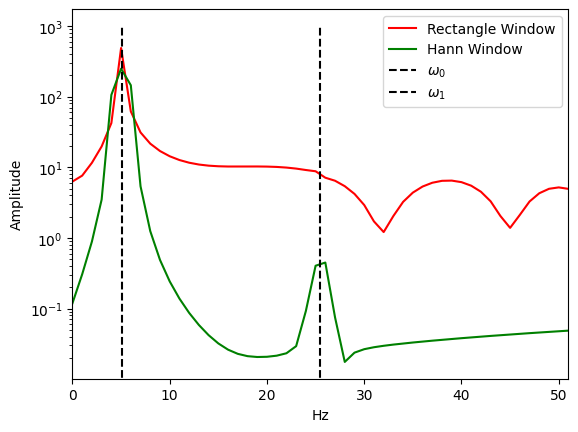

In [98]:
plt.plot(np.abs(spectrumRectangle), '', label='Rectangle Window', c='r')
plt.plot(np.abs(spectrumHann), label='Hann Window', c='g')
plt.vlines(w0, 0, 1000, linestyles='--', label=f'$\omega_{0}$', colors='k')
plt.vlines(w1, 0, 1000, linestyles='--', label=f'$\omega_{1}$', colors='k')
plt.xlim([0, max(w0, w1) * 2])
plt.xlabel("Hz")
plt.ylabel("Amplitude")
plt.yscale('log')
plt.legend()
plt.show()